In [ ]:
#Random Forest trained with linear data, with data augmentation SAME for each label and using labels-v4

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# timestep
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"
d_lin_path=main_path+"datasets_linear-v4/"
feat_path=d_lin_path+"features/"

columns = ["# contraints","# variables","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% terms in obj func","% positive in constr","% positive in obj func","timestep","solver"]
names=[]
num_rest=[]
num_var=[]
r_unary=[]
r_binary=[]
r_ternary=[]
r_cuaternary=[]
t_fo=[]
t_pos_r=[]
t_pos_fo=[]
timestep=[]
solvers=[]

#Recolectar data de txt files
with open(d_path+"txt_files/data_ordered.txt") as f:
    lines = f.readlines()
    for l in lines:
        words=l.split()
        bench=words[0][words[0].find("/")+1:words[0].rfind("/")]
        name=words[0][words[0].rfind("/")+1:words[0].rfind(".")]
        name=name+".linearized"
        print(bench,name)
        with open(feat_path+bench+"/"+name) as feat_f:
            l=feat_f.readlines()
            w=l[0].split()
            for n in range(500): #repetir 500 cada instancia, para que cuadre con los timesteps
                names.append(w[0])
                num_rest.append(int(w[1]))
                num_var.append(int(w[2]))
                r_unary.append(float(w[3]))
                r_binary.append(float(w[4]))
                r_ternary.append(float(w[5]))
                r_cuaternary.append(float(w[6]))
                t_fo.append(float(w[7]))
                t_pos_r.append(float(w[8]))
                t_pos_fo.append(float(w[9]))
                timestep.append(n)
        
with open(main_path+"labels-v4.txt") as f:
    lines = f.readlines()
    for l in lines:
        for word in l.split():
            solvers.append(int(word))

Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irabcde.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irEDCBA.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irabcde.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irEDCBA.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irabcde.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irEDCBA.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irabcde.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irEDCBA.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-abcdeir.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-combined-EDCBAir.linearized
Benchmark1 normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irabcde.linearized
Benchmark1 normalized-single-obj-f4-Data

Benchmark11 normalized-single-obj-f48-DC_TotalLoss.seq-A-2-combined-irabcde.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-B-2-2-irEDCBA.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-A-2-2-irabcde.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-A-2-2-irEDCBA.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-B-2-2-irabcde.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-B-2-1-irabcde.linearized
Benchmark12 normalized-single-obj-f51-DC_side2.seq-B-2-1-irEDCBA.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-A-2-1-irEDCBA.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-A-2-1-irabcde.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-A-2-combined-irabcde.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-B-2-combined-irabcde.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-B-2-combined-irEDCBA.linearized
Benchmark12 normalized-single-obj-f50-DC_side2.seq-A-2-c

Benchmark30 normalized-graphpart_2g-0055-0062.linearized
Benchmark30 normalized-graphpart_2g-0066-0066.linearized
Benchmark30 normalized-graphpart_2g-0077-0077.linearized
Benchmark30 normalized-graphpart_2g-0088-0088.linearized
Benchmark30 normalized-graphpart_2g-0099-9211.linearized
Benchmark30 normalized-graphpart_2g-1010-0824.linearized
Benchmark31 normalized-graphpart_3g-0234-0234.linearized
Benchmark31 normalized-graphpart_3g-0333-0333.linearized
Benchmark31 normalized-graphpart_3g-0244-0244.linearized
Benchmark31 normalized-graphpart_3g-0334-0334.linearized
Benchmark31 normalized-graphpart_3g-0344-0344.linearized
Benchmark31 normalized-graphpart_3g-0444-0444.linearized
Benchmark32 normalized-pb351595.linearized
Benchmark32 normalized-pb351555.linearized
Benchmark32 normalized-pb351575.linearized
Benchmark32 normalized-pb351535.linearized
Benchmark32 normalized-pb302075.linearized
Benchmark32 normalized-pb302035.linearized
Benchmark32 normalized-pb302095.linearized
Benchmark32 nor

Benchmark50 normalized-hw32-vm99p-opt.opb.negationfix.linearized
Benchmark50 normalized-hw32-vm100p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm25p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm50p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm75p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm85p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm90p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm95p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm98p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm99p-opt.opb.negationfix.linearized
Benchmark51 normalized-hw64-vm100p-opt.opb.negationfix.linearized
Benchmark52 normalized-hw128-vm25p-opt.opb.negationfix.linearized
Benchmark52 normalized-hw128-vm50p-opt.opb.negationfix.linearized
Benchmark52 normalized-hw128-vm75p-opt.opb.negationfix.linearized
Benchmark52 normalized-hw128-vm85p-opt.opb.negationfix.linearized
Benchmark53 normali

Benchmark84 normalized-NG.dot_luby_20null20mast_rapportOE1.0_TMAX300_K192_cod1.linearized
Benchmark85 normalized-NG.dot_luby_50null50mast_rapportOE2.0_TMAX300_K192_cod1.linearized
Benchmark85 normalized-NG.dot_luby_50null20mast_rapportOE1.0_TMAX180_K192_cod1.linearized
Benchmark86 normalized-NG.dot_unif_0null50mast_rapportOE1.0_TMAX300_K192_cod1.linearized
Benchmark86 normalized-NG.dot_unif_0null20mast_rapportOE2.0_TMAX120_K192_cod2.linearized
Benchmark87 normalized-NG.dot_unif_10null0mast_rapportOE2.0_TMAX60_K192_cod1.linearized
Benchmark87 normalized-NG.dot_unif_10null0mast_rapportOE2.0_TMAX300_K192_cod1.linearized
Benchmark88 normalized-NG.dot_unif_20null20mast_rapportOE2.0_TMAX180_K192_cod1.linearized
Benchmark88 normalized-NG.dot_unif_20null20mast_rapportOE2.0_TMAX120_K192_cod1.linearized
Benchmark89 normalized-NG.dot_unif_50null50mast_rapportOE1.0_TMAX15_K192_cod1.linearized
Benchmark90 normalized-minisat50_4_16_9.linearized
Benchmark90 normalized-minisat50_4_16_8.linearized
Benc

Benchmark105 normalized-ped2.B.recomb1-0.20-12.linearized
Benchmark105 normalized-ped2.B.recomb1-0.20-11.linearized
Benchmark105 normalized-ped2.B.recomb1-0.20-13.linearized
Benchmark105 normalized-ped2.B.recomb1-0.20-15.linearized
Benchmark106 normalized-ped3.D.recomb10-0.20-15.linearized
Benchmark106 normalized-ped3.D.recomb10-0.20-11.linearized
Benchmark106 normalized-ped3.D.recomb10-0.20-14.linearized
Benchmark106 normalized-ped3.D.recomb10-0.20-12.linearized
Benchmark106 normalized-ped3.D.recomb10-0.20-13.linearized
Benchmark107 normalized-BA_RDC4.dot_fibo_0null0mast_rapportOE2.0_TMAX180_K67_cod2.linearized
Benchmark108 normalized-BA_RDC4.dot_fibo_10null10mast_rapportOE1.0_TMAX120_K67_cod2.linearized
Benchmark109 normalized-BA_RDC4.dot_fibo_20null10mast_rapportOE2.0_TMAX15_K67_cod2.linearized
Benchmark109 normalized-BA_RDC4.dot_fibo_20null0mast_rapportOE1.0_TMAX180_K67_cod2.linearized
Benchmark110 normalized-BA_RDC4.dot_fibo_50null50mast_rapportOE2.0_TMAX15_K67_cod2.linearized
Ben

Benchmark159 normalized-p6b.linearized
Benchmark160 normalized-pb-simp-nonunif.linearized
Benchmark161 normalized-protfold.linearized
Benchmark162 normalized-queens-30.linearized
Benchmark163 normalized-seymour.linearized
Benchmark164 normalized-tanglegram1.linearized
Benchmark164 normalized-tanglegram3.linearized
Benchmark165 normalized-toll-like.linearized
Benchmark166 normalized-wnq-n100-mw99-14.linearized
Benchmark167 normalized-mul_8_3_shg.linearized
Benchmark167 normalized-mul_8_9_shg.linearized
Benchmark167 normalized-mul_8_14_shg.linearized
Benchmark167 normalized-mul_8_11_shg.linearized
Benchmark167 normalized-mul_8_13_shg.linearized
Benchmark168 normalized-sbox_4_shg.linearized
Benchmark168 normalized-sbox_8_shg.linearized
Benchmark169 normalized-plasma-widgets-workspace.cudf.paranoid.linearized
Benchmark169 normalized-mono-mcs.cudf.paranoid.linearized
Benchmark169 normalized-mono-gac.cudf.paranoid.linearized
Benchmark169 normalized-libmono-relaxng1.0-cil.cudf.paranoid.linear

Benchmark182 normalized-rand00ebc7.cudf.paranoid.linearized
Benchmark182 normalized-randf66c83.cudf.paranoid.linearized
Benchmark182 normalized-randd7b2b4.cudf.paranoid.linearized
Benchmark182 normalized-randc7f8e5.cudf.paranoid.linearized
Benchmark182 normalized-randcebca4.cudf.paranoid.linearized
Benchmark182 normalized-rand27da90.cudf.paranoid.linearized
Benchmark182 normalized-rand3c03fd.cudf.paranoid.linearized
Benchmark182 normalized-randf794d2.cudf.paranoid.linearized
Benchmark182 normalized-randc5fe62.cudf.paranoid.linearized
Benchmark182 normalized-rand18b530.cudf.paranoid.linearized
Benchmark182 normalized-randa2004a.cudf.paranoid.linearized
Benchmark182 normalized-randfd04d4.cudf.paranoid.linearized
Benchmark182 normalized-rand5d20db.cudf.paranoid.linearized
Benchmark182 normalized-rand4b919e.cudf.paranoid.linearized
Benchmark182 normalized-rand362510.cudf.paranoid.linearized
Benchmark182 normalized-rand0a62b6.cudf.paranoid.linearized
Benchmark182 normalized-randc18b26.cudf.

Benchmark193 normalized-aries-da_network_1000_5__369_766__16.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__32.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__64.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__128.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__256.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__512.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__1024.linearized
Benchmark193 normalized-aries-da_network_1000_5__369_766__2048.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792__8.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792__16.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792__32.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792__64.linearized
Benchmark194 normalized-aries-da_network_2000_5__647_1792

Benchmark210 normalized-bsg_100_25_2.linearized
Benchmark210 normalized-bsg_100_10_4.linearized
Benchmark210 normalized-bsg_100_25_4.linearized
Benchmark210 normalized-bsg_100_25_1.linearized
Benchmark210 normalized-bsg_100_25_3.linearized
Benchmark211 normalized-bsg_200_25_3.linearized
Benchmark211 normalized-bsg_200_25_1.linearized
Benchmark211 normalized-bsg_200_25_2.linearized
Benchmark211 normalized-bsg_200_25_4.linearized
Benchmark211 normalized-bsg_200_25_5.linearized
Benchmark211 normalized-bsg_200_10_1.linearized
Benchmark211 normalized-bsg_200_10_5.linearized
Benchmark211 normalized-bsg_200_10_2.linearized
Benchmark211 normalized-bsg_200_10_3.linearized
Benchmark211 normalized-bsg_200_10_4.linearized
Benchmark212 normalized-bsg_500_60_5.linearized
Benchmark212 normalized-bsg_500_60_4.linearized
Benchmark212 normalized-bsg_500_60_3.linearized
Benchmark212 normalized-bsg_500_60_2.linearized
Benchmark212 normalized-bsg_500_60_1.linearized
Benchmark212 normalized-bsg_500_25_5.lin

Benchmark226 factor-mod-size=5-P0=17-P1=7-P2=11-P3=17-P4=11-B.linearized
Benchmark226 factor-mod-size=5-P0=17-P1=13-P2=29-P3=37-P4=23-B.linearized
Benchmark226 factor-mod-size=5-P0=23-P1=29-P2=23-P3=19-P4=2-P5=23-B.linearized
Benchmark226 factor-mod-size=5-P0=29-P1=11-P2=11-P3=17-P4=29-P5=23-B.linearized
Benchmark226 factor-mod-size=5-P0=17-P1=13-P2=11-P3=19-P4=11-P5=23-B.linearized
Benchmark226 factor-mod-size=5-P0=2-P1=13-P2=23-P3=29-P4=29-P5=11-B.linearized
Benchmark226 factor-mod-size=5-P0=19-P1=5-P2=7-P3=19-P4=29-P5=29-B.linearized
Benchmark226 factor-mod-size=5-P0=11-P1=29-P2=19-P3=7-P4=2-P5=13-P6=23-B.linearized
Benchmark226 factor-mod-size=5-P0=29-P1=29-P2=17-P3=7-P4=5-P5=13-P6=5-B.linearized
Benchmark226 factor-mod-size=5-P0=19-P1=29-P2=19-P3=23-P4=2-P5=29-P6=7-B.linearized
Benchmark226 factor-mod-size=5-P0=7-P1=11-P2=23-P3=23-P4=29-P5=31-P6=13-B.linearized
Benchmark226 factor-mod-size=5-P0=29-P1=31-P2=13-P3=17-P4=29-P5=2-P6=29-B.linearized
Benchmark226 factor-mod-size=5-P0=5-

Benchmark229 factor-mod-size=8-P0=149-P1=191-P2=149-P3=191-B.linearized
Benchmark229 factor-mod-size=8-P0=149-P1=19-P2=137-P3=191-P4=223-B.linearized
Benchmark229 factor-mod-size=8-P0=149-P1=13-P2=53-P3=149-P4=137-B.linearized
Benchmark229 factor-mod-size=8-P0=211-P1=223-P2=251-P3=3-P4=107-B.linearized
Benchmark229 factor-mod-size=8-P0=149-P1=79-P2=59-P3=73-P4=211-B.linearized
Benchmark229 factor-mod-size=8-P0=191-P1=151-P2=41-P3=257-P4=191-B.linearized
Benchmark229 factor-mod-size=8-P0=47-P1=211-P2=233-P3=173-P4=181-P5=71-B.linearized
Benchmark229 factor-mod-size=8-P0=139-P1=101-P2=227-P3=251-P4=227-P5=251-B.linearized
Benchmark229 factor-mod-size=8-P0=71-P1=29-P2=241-P3=127-P4=67-P5=23-B.linearized
Benchmark229 factor-mod-size=8-P0=79-P1=163-P2=61-P3=127-P4=163-P5=211-B.linearized
Benchmark229 factor-mod-size=8-P0=173-P1=191-P2=127-P3=113-P4=97-P5=167-B.linearized
Benchmark229 factor-mod-size=8-P0=29-P1=61-P2=43-P3=131-P4=2-P5=59-P6=41-B.linearized
Benchmark229 factor-mod-size=8-P0=1

Benchmark232 normalized-mps-v2-20-10-sample2.linearized
Benchmark232 normalized-mps-v2-20-10-rgn.linearized
Benchmark232 normalized-mps-v2-20-10-mod013.linearized
Benchmark232 normalized-mps-v2-20-10-egout.linearized
Benchmark232 normalized-mps-v2-20-10-bell5.linearized
Benchmark232 normalized-mps-v2-20-10-bell4.linearized
Benchmark232 normalized-mps-v2-20-10-misc05.linearized
Benchmark232 normalized-mps-v2-20-10-bell3a.linearized
Benchmark232 normalized-mps-v2-20-10-bell3b.linearized
Benchmark232 normalized-mps-v2-20-10-dcmulti.linearized
Benchmark232 normalized-mps-v2-20-10-fixnet4.linearized
Benchmark232 normalized-mps-v2-20-10-fixnet3.linearized
Benchmark232 normalized-mps-v2-20-10-set1al.linearized
Benchmark232 normalized-mps-v2-20-10-set1cl.linearized
Benchmark232 normalized-mps-v2-20-10-gen.linearized
Benchmark232 normalized-mps-v2-20-10-khb05250.linearized
Benchmark232 normalized-mps-v2-20-10-misc06.linearized
Benchmark232 normalized-mps-v2-20-10-misc04.linearized
Benchmark233 

Benchmark276 normalized-factor-sizeN=60-sizeP=31-sizeQ=60-784051325-max.linearized
Benchmark276 normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155.linearized
Benchmark276 normalized-factor-sizeN=60-sizeP=31-sizeQ=60-472296155-max.linearized
Benchmark277 normalized-factor-sizeN=80-sizeP=41-sizeQ=80-898154415.linearized
Benchmark277 normalized-factor-sizeN=80-sizeP=41-sizeQ=80-898154415-max.linearized
Benchmark277 normalized-factor-sizeN=80-sizeP=41-sizeQ=80-505615378.linearized
Benchmark277 normalized-factor-sizeN=80-sizeP=41-sizeQ=80-505615378-max.linearized
Benchmark278 normalized-factor-sizeN=100-sizeP=51-sizeQ=100-416317114-max.linearized
Benchmark278 normalized-factor-sizeN=100-sizeP=51-sizeQ=100-520972534.linearized
Benchmark278 normalized-factor-sizeN=100-sizeP=51-sizeQ=100-520972534-max.linearized
Benchmark278 normalized-factor-sizeN=100-sizeP=51-sizeQ=100-416317114.linearized
Benchmark279 normalized-factor-sizeN=120-sizeP=61-sizeQ=120-883133839.linearized
Benchmark279 norma

Benchmark308 normalized-mps-v2-20-10-nw04.linearized
Benchmark309 normalized-mps-v2-20-10-t1717.linearized
Benchmark310 normalized-mps-v2-20-10-vpm2.linearized
Benchmark311 normalized-mps-v2-20-10-seymour1.linearized
Benchmark311 normalized-mps-v2-20-10-neos9.linearized
Benchmark312 normalized-reduced-mps-v2-20-10-ds.linearized
Benchmark313 normalized-reduced-mps-v2-20-10-fome12.linearized
Benchmark313 normalized-reduced-mps-v2-20-10-fome13.linearized
Benchmark314 normalized-ws97-3.linearized
Benchmark315 normalized-mps-v2-20-10-bm23.linearized
Benchmark316 normalized-mps-v2-20-10-cracpb1.linearized
Benchmark318 normalized-mps-v2-20-10-lseu.linearized
Benchmark318 normalized-mps-v2-20-10-lp4l.linearized
Benchmark318 normalized-mps-v2-20-10-l152lav.linearized
Benchmark319 normalized-mps-v2-20-10-mod008.linearized
Benchmark319 normalized-mps-v2-20-10-mod010.linearized
Benchmark320 normalized-mps-v2-20-10-p0033.linearized
Benchmark320 normalized-mps-v2-20-10-p0040.linearized
Benchmark320 

Benchmark329 normalized-reduced-mps-v2-20-10-rd-rplusc-21.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-momentum3.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-van.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-sp97ar.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-mod011.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-stp3d.linearized
Benchmark329 normalized-reduced-mps-v2-20-10-dano3mip.linearized
Benchmark331 normalized-reduced-mps-v2-20-10-bk4x3.linearized
Benchmark333 normalized-reduced-mps-v2-20-10-n3707.linearized
Benchmark333 normalized-reduced-mps-v2-20-10-n3703.linearized
Benchmark334 normalized-reduced-mps-v2-20-10-ran10x10a.linearized
Benchmark334 normalized-reduced-mps-v2-20-10-ran16x16.linearized
Benchmark334 normalized-reduced-mps-v2-20-10-ran17x17.linearized
Benchmark335 normalized-reduced-mps-v2-20-10-fome11.linearized
Benchmark336 normalized-reduced-mps-v2-20-10-markshare1_1.linearized
Benchmark336 normalized-reduced-mps-v2

Benchmark346 normalized-ii32e3.linearized
Benchmark346 normalized-ii32d2.linearized
Benchmark346 normalized-ii32b3.linearized
Benchmark346 normalized-ii32b4.linearized
Benchmark346 normalized-ii32e4.linearized
Benchmark346 normalized-ii8b3.linearized
Benchmark346 normalized-ii8e2.linearized
Benchmark346 normalized-ii8d2.linearized
Benchmark346 normalized-ii16e2.linearized
Benchmark346 normalized-ii8c2.linearized
Benchmark346 normalized-ii32a1.linearized
Benchmark346 normalized-ii8b4.linearized
Benchmark346 normalized-ii32e5.linearized
Benchmark346 normalized-ii16d2.linearized
Benchmark346 normalized-ii16c2.linearized
Benchmark346 normalized-ii16e1.linearized
Benchmark346 normalized-ii16b2.linearized
Benchmark346 normalized-ii16d1.linearized
Benchmark346 normalized-ii16c1.linearized
Benchmark346 normalized-ii32d3.linearized
Benchmark346 normalized-ii32c4.linearized
Benchmark346 normalized-ii16a1.linearized
Benchmark346 normalized-ii16a2.linearized
Benchmark346 normalized-ii16b1.lineariz

Benchmark360 normalized-OGR_11.linearized
Benchmark360 normalized-OGR_12.linearized
Benchmark360 normalized-OGR_13.linearized
Benchmark360 normalized-OGR_14.linearized
Benchmark360 normalized-OGR_15.linearized
Benchmark360 normalized-OGR_16.linearized
Benchmark360 normalized-OGR_17.linearized
Benchmark360 normalized-OGR_18.linearized
Benchmark360 normalized-OGR_19.linearized
Benchmark360 normalized-OGR_20.linearized
Benchmark361 normalized-simp-nonunif-100_100.11.linearized
Benchmark361 normalized-simp-nonunif-100_100.07.linearized
Benchmark361 normalized-simp-nonunif-100_100.02.linearized
Benchmark361 normalized-simp-nonunif-100_100.14.linearized
Benchmark361 normalized-simp-nonunif-100_100.12.linearized
Benchmark361 normalized-simp-nonunif-100_100.10.linearized
Benchmark362 normalized-simp-unif-100_100.00.linearized
Benchmark362 normalized-simp-unif-100_100.08.linearized
Benchmark363 normalized-ex5inp.r.linearized
Benchmark363 normalized-bbara.r.linearized
Benchmark363 normalized-opu

Benchmark374 normalized-factor-size=9-P=11-Q=53.linearized
Benchmark374 normalized-factor-size=9-P=283-Q=293.linearized
Benchmark374 normalized-factor-size=9-P=89-Q=293.linearized
Benchmark374 normalized-factor-size=9-P=89-Q=317.linearized
Benchmark374 normalized-factor-size=9-P=113-Q=233.linearized
Benchmark374 normalized-factor-size=9-P=113-Q=331.linearized
Benchmark374 normalized-factor-size=9-P=89-Q=487.linearized
Benchmark374 normalized-factor-size=9-P=113-Q=479.linearized
Benchmark374 normalized-factor-size=9-P=127-Q=137.linearized
Benchmark374 normalized-factor-size=9-P=257-Q=503.linearized
Benchmark374 normalized-factor-size=9-P=97-Q=509.linearized
Benchmark374 normalized-factor-size=9-P=127-Q=149.linearized
Benchmark374 normalized-factor-size=9-P=127-Q=211.linearized
Benchmark374 normalized-factor-size=9-P=251-Q=379.linearized
Benchmark374 normalized-factor-size=9-P=127-Q=359.linearized
Benchmark374 normalized-factor-size=9-P=127-Q=389.linearized
Benchmark374 normalized-factor

In [3]:
#Crear dataframe
# dataframe with no names, so that it doesn't convert everything to str 
data=np.array([num_rest,num_var,r_unary,r_binary,r_ternary,r_cuaternary,t_fo,t_pos_r,t_pos_fo,timestep,solvers])
df = pd.DataFrame(data.T, columns=columns)
            
#print(df.head())

In [4]:
x=df[["# contraints","# variables","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% terms in obj func","% positive in constr","% positive in obj func","timestep"]]
y=df[['solver']]

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
inst_train=[]
test_indx=[]
for i in range(0,3128): #v4
    r = random.randint(0,2)
    if(r==2):
        for j in range(0,500):
            test_indx.append(500*i+j)
    else:
        inst_train.append(i)
        for j in range(0,500):
            train_indx.append(500*i+j)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1027000, 10)
(537000, 10)
(1027000, 1)
(537000, 1)


In [5]:
#Data augmentation para training set de instancias con clases distintas a gurobi (5)

indx_dis=[] #indexes of instances with disadvantaged labels 

#identificar instancias que tengan clase distinta a gurobi
for i in inst_train:
    has_dis=False
    for j in range(500):
        ind=500*i+j
        if(solvers[ind]!=5):
            has_dis=True
            break
    if(has_dis):
        for j in range(500):
            indx_dis.append(500*i+j)

print(len(indx_dis))
print(len(train_indx), end="\n\n")            

#agregar las instancias al final de x_train e y_train
x_train_dis=x.iloc[indx_dis]
y_train_dis=y.iloc[indx_dis]

x_train=x_train.append(x_train_dis)
y_train=y_train.append(y_train_dis)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

674500
1027000

(1701500, 10)
(537000, 10)
(1701500, 1)
(537000, 1)


In [6]:
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", criterion="gini",random_state=3)
rf_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [7]:
y_pred = rf_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [8]:
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = rf_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy 0.7159683426443203
Loss 4.339982562736742


In [9]:
#Save
l=int(len(y_test)/500)
y_test_np=y_test.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_linear-v4/results/y_test.txt", "w")
np.savetxt(f,y_test_np.reshape(y_test_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_pred)/500)
y_pred_np=y_pred.reshape(l,500)
f = open(main_path+"models/v4/randomForest_linear-v4/results/y_preds.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

#print(y_pred_np.shape)
#print(y_pred_np)

In [10]:
l=int(len(y_train)/500)
y_train_np=y_train.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_linear-v4/results/y_train.txt", "w")
np.savetxt(f,y_train_np.reshape(y_train_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_train_og)/500)
y_train_og_np=y_train_og.to_numpy().reshape(l,500)
f = open(main_path+"models/v4/randomForest_linear-v4/results/y_train_og.txt", "w")
np.savetxt(f,y_train_og_np.reshape(y_train_og_np.shape[0], -1),fmt="%s")
f.close()

In [11]:
#Feature importances
importances = rf_model.feature_importances_
feats = x.columns

f=open(main_path+"models/v4/randomForest_linear-v4/results/features_and_acc.txt", "w")

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    f.write("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

print(metrics.accuracy_score(y_test.values.ravel(), y_pred))
f.write("Testing accuracy: "+str(metrics.accuracy_score(y_test.values.ravel(), y_pred)))

f.close()

Importance of feature # contraints is 0.11785079141223714
Importance of feature # variables is 0.0952312792591841
Importance of feature % 1 term constr is 0.04345261374108612
Importance of feature % 2 terms constr is 0.06030759623715025
Importance of feature % 3 terms constr is 0.09933248743106919
Importance of feature % 4+ terms constr is 0.10330471814191329
Importance of feature % terms in obj func is 0.152933725742097
Importance of feature % positive in constr is 0.11868709879502232
Importance of feature % positive in obj func is 0.053843463527635894
Importance of feature timestep is 0.15505622571260466
0.7159683426443203


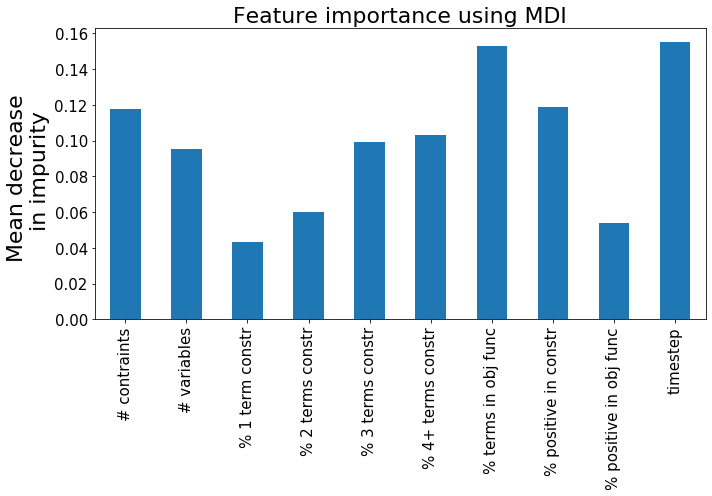

In [13]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax, figsize = (10,7), fontsize=fsize-7)
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

# Prediction Time

In [9]:
#Calcular tiempos de predicción por cada par instancia-tiempo de test
#(Correr esto se demora 1 hora aprox)

l=int(len(y_pred)/500)
t_preds=np.empty(l*500)
i=0

#prediccion
for idx in test_indx:
    #crear dataframe de solo esa instancia-timestep
    x_i = x.iloc[[idx]]
    
    #hacer predicción y medir tiempo
    start=time.time()
    y_i = rf_model.predict(np.nan_to_num(x_i.astype(np.float32)))
    tiempo=time.time()-start
    t_preds[i]=tiempo
    
    i=i+1

In [10]:
#Guardar tiempos de prediccion

print(t_preds)
f = open(main_path+"models/results-v4/pred_times/t_pred_randomForest_linear-v4.txt", "w")
np.savetxt(f, t_preds, delimiter=" ", fmt="%s")
f.close()

[0.02908897 0.01693845 0.01568604 ... 0.00883794 0.0088675  0.00883245]


https://data36.com/random-forest-in-python/
